<a href="https://colab.research.google.com/github/jersonvc/Data-Processing/blob/main/Proyecto_BRB/Ensayo_Compresi%C3%B3n_Probetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [51]:
D = 150
hn = 150
A = np.pi*(D/10)**2/4

In [50]:
dataset = []
for file in os.listdir():
  if file.endswith('.txt'):
    dataset.append(file)

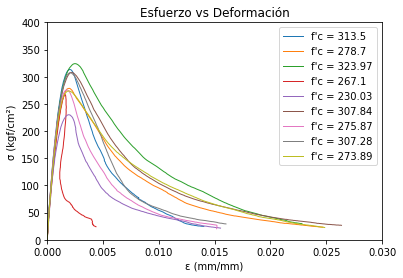

In [59]:
fig, ax = plt.subplots()
plt.axis([0, 0.03, 0, 400])
for data in dataset:
  df = pd.read_table(data, sep = '\t', names = ['step', 'date', 'ch0', 'ch1', 'ch2', 'ch3', 'ch4', 'cabezal', 'nucleo'], skiprows = 3, header = None, encoding = 'latin')
  stress = list(map(lambda x: x*1000/A, df['ch0']))
  strain = list(map(lambda x: x/hn, df['nucleo']))
  max_str = max(stress)
  ax.plot(strain, stress, lw=1, linestyle = "-", label="f'c = {}".format(round(max_str,2)))
ax.set_title('Esfuerzo vs Deformación')
plt.xlabel("ɛ (mm/mm)")
plt.ylabel("σ (kgf/cm²)")
ax.legend(fontsize=10, loc='upper right')
plt.savefig('Resultados.png', dpi = 1200)